In [3]:
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [14]:
df = pd.read_csv('/sunspots.csv', sep='\t')
df.tail(3)

,Month,SunSpots
3140,3140,25.2
3141,3141,23.5
3142,3142,21.6


In [11]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def anomalies(y, window_size, sigma=1.0):
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}

def plot_results(x, y, window_size, sigma_value=1,
                 xlabel="X Axis", ylabel="Y Axis",xlim=1000):
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    events = {}
   
    events = anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*", markersize=12)

    plt.grid(True)
    plt.show()

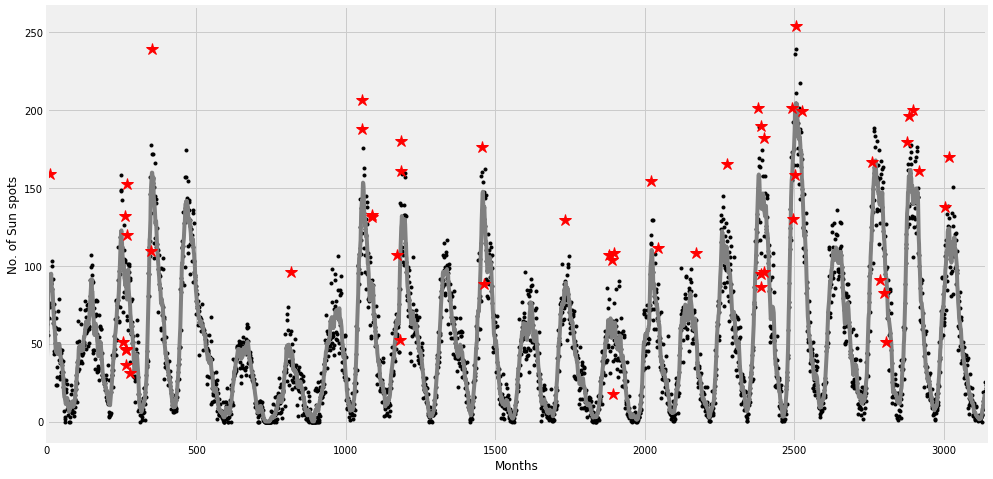

Info:{'standard_deviation': 11.424, 'anomalies_dict': OrderedDict([(10, 158.6), (253, 142.5), (255, 51.0), (262, 132.2), (264, 36.0), (268, 152.7), (278, 31.1), (349, 109.3), (352, 238.9), (361, 165.7), (818, 96.2), (986, 93.4), (1055, 206.3), (1069, 84.8), (1172, 107.1), (1182, 52.2), (1185, 180.4), (1464, 88.3), (1735, 129.2), (1882, 107.2), (1890, 103.6), (1897, 108.2), (2023, 154.5), (2025, 72.2), (2027, 129.3), (2171, 108.0), (2274, 165.3), (2380, 201.3), (2390, 94.8), (2391, 189.7), (2503, 158.0), (2518, 152.3), (2520, 217.4), (2521, 143.1), (2527, 199.6), (2755, 58.1), (2756, 138.2), (2789, 90.9), (2807, 127.0), (2885, 196.2), (2886, 126.9), (2897, 105.4), (2899, 200.3), (3005, 137.7), (3018, 170.1), (3032, 150.7)])}


In [12]:
x = df['Month']
y = df['SunSpots']

# plot the results
plot_results(x, y=y, window_size=10, xlabel="Months", sigma_value=3, ylabel="No. of Sun spots", xlim=len(y))
events = anomalies(y, window_size=5, sigma=3)

# Display the anomaly dict
print("Info:{}".format(events))

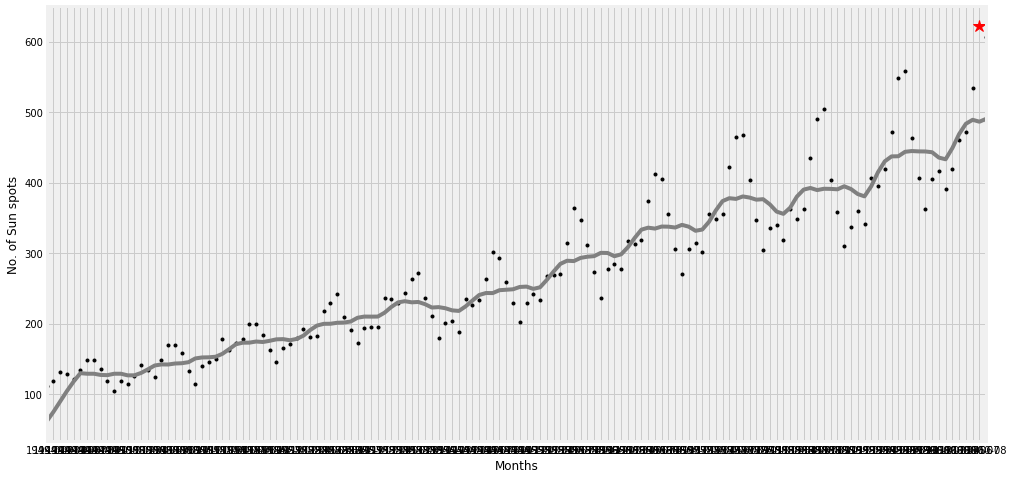

Info:{'standard_deviation': 26.75, 'anomalies_dict': OrderedDict([(143, 432)])}


In [16]:
df = pd.read_csv('/AirPassengers.csv')

x = df['Month']
y = df['#Passengers']

# plot the results
plot_results(x, y=y, window_size=10, xlabel="Months", sigma_value=3, ylabel="No. of Sun spots", xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

# Display the anomaly dict
print("Info:{}".format(events))